<h1>Car accident severity prediction model</h1>

<h2>Introduction: Business understanding (Problem)</h2>

We live in a world where a lot of statistic that directly affect road transportation are publicly available, these statistic include weather reports, visiblity, cogesion on certain days or dates, and so on.

These statistics are used to design a model which uses the available statistics in order to predict the likelihood of an accident happening.

Since almost everybody finds themselves on the road almost everyday, this model is targeted to everyone. so when every a person wants to go out, they can check and see if it is safe for them.

<h2>Data Understanding</h2>

The dataset used contains data about car accidents provided by SPD and recorded by Traffic Records. I contains 40 columns, 39 of which are independent variable and a target variabl 'SEVERITYCODE' which will be predicted.

<h2>Methodology</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
accident_df = pd.read_csv('Collisions.csv',encoding = "utf-8",low_memory=False)
accident_df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


In [3]:
#getting the shape of the dataset
print("Rows: ",accident_df.shape[0])
print("Columns: ",accident_df.shape[1])

Rows:  221266
Columns:  40


In [4]:
#full description of the dataset
accident_df.describe(include="all")

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,213797.000000,213797.000000,221266.000000,221266.000000,221266.000000,221266,221266,217554,71823.000000,216680,...,194658,194490,5188,1.272050e+05,9913,211853,194767,221266.000000,2.212660e+05,221266
unique,NaN,NaN,NaN,NaN,NaN,221263,2,3,NaN,25193,...,9,9,1,NaN,1,63,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,1780512,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,2,194840,144857,NaN,298,...,128171,119166,5188,NaN,9913,44842,44842,NaN,NaN,209290
mean,-122.330752,47.620205,110633.500000,144603.603179,144831.128840,NaN,NaN,NaN,37616.272768,NaN,...,NaN,NaN,NaN,7.971063e+06,NaN,NaN,NaN,261.441573,9.588454e+03,NaN
std,0.030054,0.056040,63874.136669,89039.925169,89413.579421,NaN,NaN,NaN,51905.450406,NaN,...,NaN,NaN,NaN,2.611523e+06,NaN,NaN,NaN,3248.850406,7.150262e+04,NaN
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,NaN,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,-122.349280,47.577302,55317.250000,71603.250000,71603.250000,NaN,NaN,NaN,28653.000000,NaN,...,NaN,NaN,NaN,6.007029e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,-122.330348,47.616053,110633.500000,127122.500000,127122.500000,NaN,NaN,NaN,29973.000000,NaN,...,NaN,NaN,NaN,8.033011e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,-122.311998,47.664290,165949.750000,209654.750000,209874.750000,NaN,NaN,NaN,33984.000000,NaN,...,NaN,NaN,NaN,1.018101e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


<h2>Column name description</h2>
<ul>
<li>X - Coordinates</li>
<li>Y - Coordinates</li>
<li>WEATHER - How the weather was during the collision</li>
<li>SPEEDING - If speeding caused the collision</li>
<li>LIGHTCOND - Visiblity during the collision</li>
<li>ROADCOND - Condition of the road</li>
<li>JUNCTION TYPE - If the collision happened at a junction</li>
<li>PERSONCOUNT - Total number of people involved in the collision</li>
<li>VEHCOUNT - Total vehicles of people involved in the collision</li>
</ul>

In [5]:
import numpy as np
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [6]:
#removing the attributes we need
accident = accident_df[["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT","SEVERITYCODE"]]
accident.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SEVERITYCODE
0,Clear,NaN,Daylight,Dry,At Intersection (intersection related),2,1,2
1,Raining,NaN,Dark - Street Lights On,Wet,At Intersection (intersection related),4,2,2
2,Clear,NaN,Daylight,Dry,Mid-Block (not related to intersection),4,3,1
3,Raining,NaN,Dark - Street Lights On,Wet,At Intersection (intersection related),2,2,1
4,NaN,NaN,NaN,NaN,Mid-Block (but intersection related),0,0,0


Next we clean the data

In [7]:
accident.WEATHER.value_counts(dropna=False)

Clear                       114361
Raining                      34021
Overcast                     28508
NaN                          26688
Unknown                      15131
Snowing                        919
Other                          853
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                    9
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [8]:
pd.set_option('mode.chained_assignment', None)
accident['WEATHER'].fillna(accident['WEATHER'].mode()[0], inplace=True)
accident['WEATHER'] = accident['WEATHER'].replace(['Unknown'],accident['WEATHER'].mode()[0])
accident = accident[accident.WEATHER !="Other"]

In [9]:
accident.WEATHER.value_counts(dropna=False)

Clear                       156180
Raining                      34021
Overcast                     28508
Snowing                        919
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                    9
Blowing Snow                     1
Name: WEATHER, dtype: int64

In [10]:
accident.SPEEDING.value_counts(dropna=False)

NaN    210525
Y        9888
Name: SPEEDING, dtype: int64

In [11]:
#replace NaN with N
accident['SPEEDING'] = accident['SPEEDING'].fillna('N')

In [12]:
accident.SPEEDING.value_counts(dropna=False)

N    210525
Y      9888
Name: SPEEDING, dtype: int64

In [13]:
accident.LIGHTCOND.value_counts(dropna=False)

Daylight                    118857
Dark - Street Lights On      49909
NaN                          26770
Unknown                      13200
Dusk                          6053
Dawn                          2590
Dark - No Street Lights       1564
Dark - Street Lights Off      1230
Other                          224
Dark - Unknown Lighting         16
Name: LIGHTCOND, dtype: int64

In [14]:
accident['LIGHTCOND'].fillna(accident['LIGHTCOND'].mode()[0], inplace=True)
accident['LIGHTCOND'] = accident['LIGHTCOND'].replace(['Unknown'],accident['LIGHTCOND'].mode()[0])
accident = accident[accident.LIGHTCOND !="Other"]

In [15]:
accident.LIGHTCOND.value_counts(dropna=False)

Daylight                    158827
Dark - Street Lights On      49909
Dusk                          6053
Dawn                          2590
Dark - No Street Lights       1564
Dark - Street Lights Off      1230
Dark - Unknown Lighting         16
Name: LIGHTCOND, dtype: int64

In [16]:
accident.ROADCOND.value_counts(dropna=False)

Dry               127878
Wet                48551
NaN                26606
Unknown            14565
Ice                 1211
Snow/Slush          1000
Other                123
Standing Water       116
Sand/Mud/Dirt         76
Oil                   63
Name: ROADCOND, dtype: int64

In [17]:
accident['ROADCOND'].fillna(accident['ROADCOND'].mode()[0], inplace=True)
accident['ROADCOND'] = accident['ROADCOND'].replace(['Unknown'],accident['ROADCOND'].mode()[0])

In [18]:
accident.ROADCOND.value_counts(dropna=False)

Dry               169049
Wet                48551
Ice                 1211
Snow/Slush          1000
Other                123
Standing Water       116
Sand/Mud/Dirt         76
Oil                   63
Name: ROADCOND, dtype: int64

In [19]:
accident.JUNCTIONTYPE.value_counts(dropna=False)

Mid-Block (not related to intersection)              100906
At Intersection (intersection related)                68950
Mid-Block (but intersection related)                  24323
NaN                                                   11868
Driveway Junction                                     11447
At Intersection (but not related to intersection)      2486
Ramp Junction                                           188
Unknown                                                  21
Name: JUNCTIONTYPE, dtype: int64

In [20]:
accident['JUNCTIONTYPE'].fillna(accident['JUNCTIONTYPE'].mode()[0], inplace=True)
accident = accident[accident.JUNCTIONTYPE !="Unknown"]

In [21]:
accident.JUNCTIONTYPE.value_counts(dropna=False)

Mid-Block (not related to intersection)              112774
At Intersection (intersection related)                68950
Mid-Block (but intersection related)                  24323
Driveway Junction                                     11447
At Intersection (but not related to intersection)      2486
Ramp Junction                                           188
Name: JUNCTIONTYPE, dtype: int64

In [22]:
accident.SEVERITYCODE.value_counts(dropna=False)

1      136586
2       58524
0       21623
2b       3088
3         346
NaN         1
Name: SEVERITYCODE, dtype: int64

In [23]:
accident['SEVERITYCODE'].fillna(accident['SEVERITYCODE'].mode()[0], inplace=True)
accident['SEVERITYCODE'] = accident['SEVERITYCODE'].replace(['3'],'4')
accident['SEVERITYCODE'] = accident['SEVERITYCODE'].replace(['2b'],'3')

In [24]:
accident.SEVERITYCODE.value_counts(dropna=False)

1    136587
2     58524
0     21623
3      3088
4       346
Name: SEVERITYCODE, dtype: int64

<h2>We start making our model</h2>

In [25]:
x = accident[["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT"]].values
y = accident[["SEVERITYCODE"]].values

In [26]:
weather = preprocessing.LabelEncoder()
weather.fit(list(accident["WEATHER"].unique()))
weather_mapping = dict(zip(weather.classes_, weather.transform(weather.classes_)))
x[:,0] = weather.transform(x[:,0]) 

speeding = preprocessing.LabelEncoder()
speeding.fit(list(accident["SPEEDING"].unique()))
speeding_mapping = dict(zip(speeding.classes_, speeding.transform(speeding.classes_)))
x[:,1] = speeding.transform(x[:,1]) 

lightcond = preprocessing.LabelEncoder()
lightcond.fit(list(accident["LIGHTCOND"].unique()))
lightcond_mapping = dict(zip(lightcond.classes_, lightcond.transform(lightcond.classes_)))
x[:,2] = lightcond.transform(x[:,2])

roadcond = preprocessing.LabelEncoder()
roadcond.fit(list(accident["ROADCOND"].unique()))
roadcond_mapping = dict(zip(roadcond.classes_, roadcond.transform(roadcond.classes_)))
x[:,3] = roadcond.transform(x[:,3])

junctiontype = preprocessing.LabelEncoder()
junctiontype.fit(list(accident["JUNCTIONTYPE"].unique()))
junctiontype_mapping = dict(zip(junctiontype.classes_, junctiontype.transform(junctiontype.classes_)))
x[:,4] = junctiontype.transform(x[:,4])

In [27]:
accident = pd.DataFrame(x)
accident.columns = ["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT"]
accident['SEVERITYCODE'] = y
accident.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SEVERITYCODE
0,2,0,5,0,1,2,1,2
1,6,0,2,7,1,4,2,2
2,2,0,5,0,4,4,3,1
3,6,0,2,7,1,2,2,1
4,2,0,5,0,3,0,0,0


Continous variable

In [28]:
accident['PERSONCOUNT_CAT'] = pd.qcut(accident['PERSONCOUNT'], q=4, duplicates='drop')
accident['VEHCOUNT_CAT'] = pd.qcut(accident['PERSONCOUNT'], q=4, duplicates='drop')
accident.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SEVERITYCODE,PERSONCOUNT_CAT,VEHCOUNT_CAT
0,2,0,5,0,1,2,1,2,"(-0.001, 2.0]","(-0.001, 2.0]"
1,6,0,2,7,1,4,2,2,"(3.0, 93.0]","(3.0, 93.0]"
2,2,0,5,0,4,4,3,1,"(3.0, 93.0]","(3.0, 93.0]"
3,6,0,2,7,1,2,2,1,"(-0.001, 2.0]","(-0.001, 2.0]"
4,2,0,5,0,3,0,0,0,"(-0.001, 2.0]","(-0.001, 2.0]"


In [29]:
x = accident[["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT","SEVERITYCODE",
            "PERSONCOUNT_CAT","VEHCOUNT_CAT"]].values

person = preprocessing.LabelEncoder()
person.fit(list(accident["PERSONCOUNT_CAT"].unique()))
person_mapping = dict(zip(person.classes_, person.transform(person.classes_)))
x[:,8] = person.transform(x[:,8]) 

veh = preprocessing.LabelEncoder()
veh.fit(list(accident["VEHCOUNT_CAT"].unique()))
veh_mapping = dict(zip(veh.classes_, veh.transform(veh.classes_)))
x[:,9] = veh.transform(x[:,9]) 

In [30]:
accident = pd.DataFrame(x)
accident.columns = ["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT","SEVERITYCODE",
                   "PERSONCOUNT_CAT","VEHCOUNT_CAT"]
accident.drop(['PERSONCOUNT','VEHCOUNT'], axis=1, inplace=True)
accident.rename(columns={'PERSONCOUNT_CAT': 'PERSONCOUNT', 'VEHCOUNT_CAT': 'VEHCOUNT'}, inplace=True)
accident.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
0,2,0,5,0,1,2,0,0
1,6,0,2,7,1,2,2,2
2,2,0,5,0,4,1,2,2
3,6,0,2,7,1,1,0,0
4,2,0,5,0,3,0,0,0


In [31]:
accident_0 = accident[accident.SEVERITYCODE == '0']
accident_1 = accident[accident.SEVERITYCODE == '1']
accident_2 = accident[accident.SEVERITYCODE == '2']
accident_3 = accident[accident.SEVERITYCODE == '3']
accident_4 = accident[accident.SEVERITYCODE == '4']
print("SHAPE 0: ",accident_0.shape)
print("SHAPE 1: ",accident_1.shape)
print("SHAPE 2: ",accident_2.shape)
print("SHAPE 3: ",accident_3.shape)
print("SHAPE 4: ",accident_4.shape)

SHAPE 0:  (21623, 8)
SHAPE 1:  (136587, 8)
SHAPE 2:  (58524, 8)
SHAPE 3:  (3088, 8)
SHAPE 4:  (346, 8)


In [32]:
maj_class =accident_0.shape[0]

accident_1_upsampled = resample(accident_1,replace=True,n_samples=maj_class,random_state=123) 

accident_2_upsampled = resample(accident_2,replace=True,n_samples=maj_class,random_state=123) 

accident_3_upsampled = resample(accident_3,replace=True,n_samples=maj_class,random_state=123) 

accident_4_upsampled = resample(accident_4,replace=True,n_samples=maj_class,random_state=123) 

accident_upsampled = pd.concat([accident_1_upsampled, accident_0, accident_2_upsampled, accident_3_upsampled, accident_4_upsampled])

print("The shape of the upsample dataframe is : ",accident_upsampled.shape)

The shape of the upsample dataframe is :  (108115, 8)


In [33]:
accident_upsampled.reset_index(inplace = True,drop=True) 
accident_upsampled.head()

,WEATHER,SPEEDING,LIGHTCOND,ROADCOND,JUNCTIONTYPE,SEVERITYCODE,PERSONCOUNT,VEHCOUNT
0,2,0,5,0,4,1,1,1
1,2,0,5,0,4,1,0,0
2,2,0,2,0,4,1,0,0
3,2,0,5,7,4,1,0,0
4,4,0,5,0,1,1,0,0


training and testing dataset

In [34]:
X = accident_upsampled[["WEATHER","SPEEDING","LIGHTCOND","ROADCOND","JUNCTIONTYPE","PERSONCOUNT","VEHCOUNT"]].values
Y = accident_upsampled["SEVERITYCODE"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

Now the models

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import svm

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

K nearest Neigbor

In [37]:
k = 8
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat_knn = neigh.predict(x_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train set Accuracy:  0.41885570824524315
Test set Accuracy:  0.411993217203638


Confusion matrix, without normalization
[[2813 1165 1436  509  497]
 [1098 1702 2161  867  697]
 [1018 1167 2532  986  746]
 [ 758 1085 1662 1227 1850]
 [   1    0 1202  167 5089]]


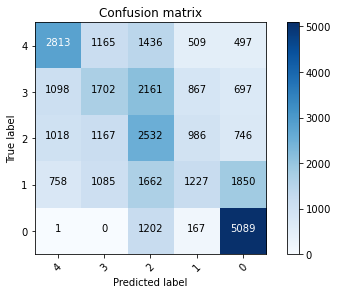

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_knn, labels=["4","3","2","1","0"])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["4","3","2","1","0"],normalize= False,  title='Confusion matrix')

logistic regression

In [39]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
yhat_lr = lr.predict(x_test)
yhat_prob_lr = lr.predict_proba(x_test)
metrics.accuracy_score(y_test, yhat_lr)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.40832434098967163

Confusion matrix, without normalization
[[2522  205 1245 1063 1385]
 [1570  413 1596 1081 1865]
 [1063  340 2270 1054 1722]
 [ 815  253 1232 1703 2579]
 [   0  117    3    3 6336]]


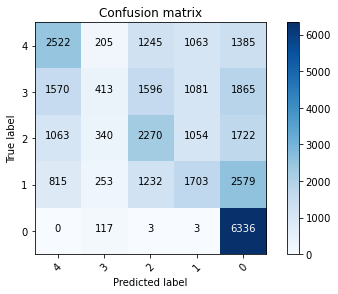

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_lr, labels=["4","3","2","1","0"])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["4","3","2","1","0"],normalize= False,  title='Confusion matrix')

support vector machine

In [41]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
yhat_svm = clf.predict(x_test)

Confusion matrix, without normalization
[[3222  171 1137  546 1344]
 [1408  731 1938  674 1774]
 [ 958  372 2724  714 1681]
 [ 896  263 1659 1264 2500]
 [   0    0    6    0 6453]]


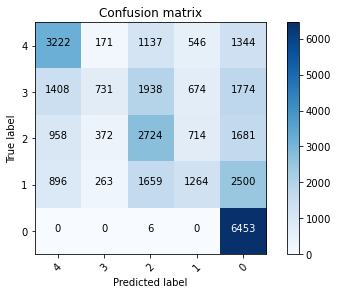

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=["4","3","2","1","0"])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["4","3","2","1","0"],normalize= False,  title='Confusion matrix')

<h2>Evaluation/Result</h2>

In [44]:
knn_score = metrics.accuracy_score(y_test, yhat_knn)
logreg_score = metrics.accuracy_score(y_test, yhat_lr)
svm_score = metrics.accuracy_score(y_test, yhat_svm)

In [45]:
knn_f1 = f1_score(y_test, yhat_knn, average='weighted')
logreg_f1 = f1_score(y_test, yhat_lr, average='weighted')
svm_f1 = f1_score(y_test, yhat_svm, average='weighted')

In [47]:
acc_df =pd.DataFrame(columns = ["Score","F1 Score"],index =["KNN","Logistic Regression","SVM"])
acc_df.loc["KNN","Score"] =knn_score.round(3)
acc_df.loc["KNN","F1 Score"] =knn_f1.round(3)
acc_df.loc["Logistic Regression","Score"] =logreg_score.round(3)
acc_df.loc["Logistic Regression","F1 Score"] =logreg_f1.round(3)
acc_df.loc["SVM","Score"] = svm_score.round(3)
acc_df.loc["SVM","F1 Score"] = svm_f1.round(3)
acc_df

,Score,F1 Score
KNN,0.412,0.396
Logistic Regression,0.408,0.356
SVM,0.444,0.393


<h2>Discussion</h2>

After training three different models, the k nearnest neigbor had an accuracy of 41.2% and an F1 score of 0.396, the Logistic regression model had an accuracy of 40.8% and an F1 score of 0.356 while the SVM had an accuracy of 44.4% and an F1 score of 0.393

<h2>Conclusion<h2>

The models trained above are a way of predicting whether or not the will be a collision on a certain day given the conditions.for cases where there will be collision, the model goes further to predict how severe the collision would be. This model is great and useful to a lot of people.